# Turing Mechanism. Linear Stability Analysis #

In this homework we are going to consider the dynamical equations:

$$\frac{\partial u}{\partial t}=\gamma f(u,v)+\nabla^2 u,$$
$$\frac{\partial v}{\partial t}=\gamma g(u,v)+d\nabla^2 v,$$
with no-flux boundary conditions. This system may become unstable producing a Turing instability. We want to analyze its linear stability analysis. Functions $f(u,v)$ and $g(u,v)$ are defined as follow:
$$f(u,v)=a-u+u^2v,$$
$$g(u,v)=b-u^2v,$$
with $a=0.2$ and $b=2.0$. We will use $\gamma=1$.

In [1]:
# loading some modules
import math
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from scipy import optimize

## Homogeneous system and its stability##

Let us study, first, the homogeneous system:
$$\frac{\partial u}{\partial t}=\gamma f(u,v),$$
$$\frac{\partial v}{\partial t}=\gamma g(u,v).$$

*** Find, both, analytically and numerically, the steady state solution $(u_0,v_0)$ for these two equations. Then, run a few simulations perturbing slightly the steady state solution. Use different initial conditions $(u,v)=(u_0+\delta_u,v_0+\delta_v)$ to guess if this fixed point solution is stable or not. Show a few example plots of your results.***

Analytically, the steady state solution is obtained by setting the time derivatives to zero.

$$0=\gamma f(u_0,v_0)$$
$$0=\gamma g(u_0,v_0)$$

That is, explicitly, after cancelling the $\gamma$ factor out

$$f(u_0,v_0)=a-u_0+u_0^2v_0=0$$
$$g(u_0,v_0)=b-u_0^2v_0=0$$

Summing both equations yields

$$u_0=a+b=2.2$$

And substituting the latter result for instance in the second equation yields

$$v_0=\frac{b}{\left(a+b\right)^2}\approx 0.41322$$

Now, use the "root" function from "scipy" to obtain the same steady state solution numerically.

In [49]:
from scipy.optimize import root

def fg(X):
    
    # Constant parameters
    a = 0.2; b = 2.0; gamma = 1;
    
    u, v = X

    f = [gamma*(a-u+u**2*v),
         gamma*(b-u**2*v)]

    return f

sol2 = root(fg, [1.0, 1.0])
print(sol2.x)

[2.2        0.41322314]


Both results match. From now on, the analytical solution will be used when initially perturbing the steady state of the system in the simulations.

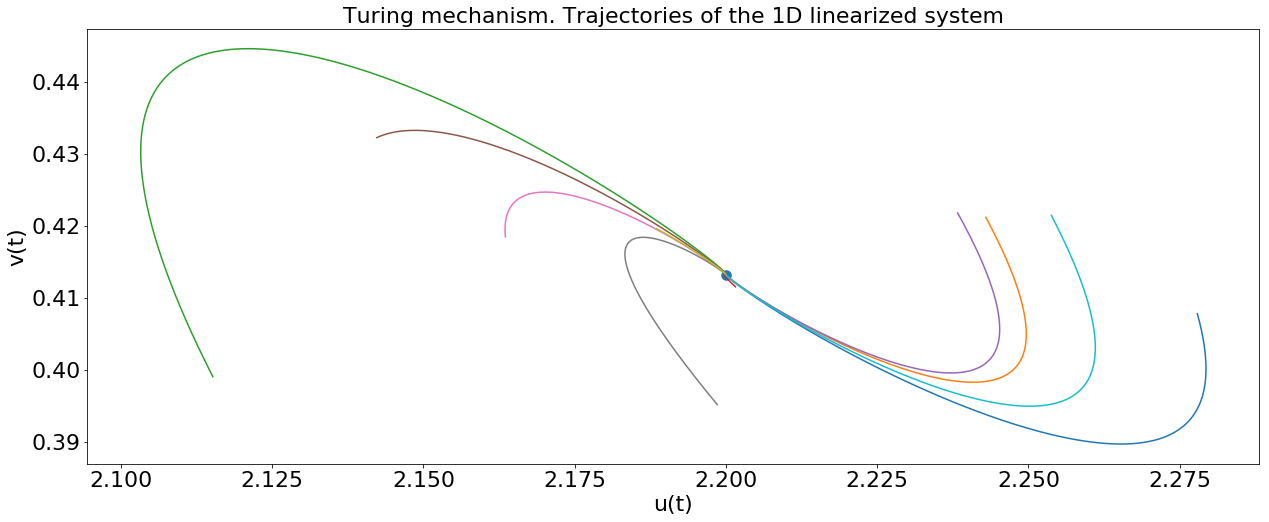

In [69]:
# Constant parameters
a = 0.2; b = 2.0; gamma = 1;

# Integration parameters
t0 = 0.0; tF = 5.0; dt = 0.001; Nt = int((tF-t0)/dt + 1)

# Steady state solution
u0 = a + b; v0 = b/(a+b)**2

# Initial conditions slightly perturbed
N = 10
u = np.zeros(N); v = np.zeros(N)
for i in range(N):
    u[i] = u0 + (0.1*u0)*(np.random.rand(1)-0.5);
    v[i] = v0 + (0.1*v0)*(np.random.rand(1)-0.5);

# Time integration
plt.figure(figsize=(21, 8))
plt.scatter(u0,v0,s=90); plt.title('Turing mechanism. Trajectories of the 1D linearized system', fontsize=22)
plt.xlabel('u(t)', fontsize=22); plt.ylabel('v(t)', fontsize=22); plt.tick_params(labelsize=22);
for i in range(N):
    ui = u[i]; vi = v[i]; t = t0; j = 0; utraj = np.zeros(Nt); vtraj = np.zeros(Nt)
    while t < tF+dt:
        t += dt
        f = a - ui + ui**2*vi
        g = b - ui**2*vi
        ui += dt*gamma*f
        vi += dt*gamma*g
        utraj[j] = ui
        vtraj[j] = vi
        j = j+1
    plt.plot(utraj,vtraj)

The fixed point is indeed stable, since the 10 random starting point trajectories reach it in finite time.

## Some calculations that will help you for the linear stability analysis##

Let us compute now, analytically, the Jacobian of the system evaluated at the steady state solution:

$$A=\left( 
\begin{array}
{rr}
\frac{\partial f}{\partial u} &\frac{\partial f}{\partial v} \\
\frac{\partial g}{\partial u} &\frac{\partial g}{\partial v} 
\end{array}
\right)_{u_0,v_0}
$$

***From this result we may define the Trace of the Jacobian ($Tr A$) and its determinant $|A|$. Determine these values.***

$$A=\left( 
\begin{array}
{rr}
-1+2u_0v_0 & u_0^2 \\
-2u_0v_0 & -u_0^2 
\end{array}
\right)
$$

From it, the trace and the determinant can be computed.

$$Tr A=-u_0^2+2u_0v_0-1$$

$$|A|=u_0^2$$

Let us define now the function:

$$
h(k^2)=dk^4-\gamma(d f_u +g_v)k^2+\gamma^2|A|
$$

where $k$ represents the wavenumber of a periodic perturbation and $f_u$, $f_v$, $g_u$ and $g_v$ represent the jacobian terms evaluated at the fixed point. The condition for the system to become unstable for modes of wavenumber $k$ is that $h(k^2)<0$.

***Evaluate this function for increasing values of $d$. Plot the curves in a single graph.***

The critical $d_c$ is, then, given by

$$d_c=\frac{-(2 f_v g_u-f_u g_v)+\sqrt{(2 f_v g_u-f_u g_v)^2- f_u^2 g_v^2}}{f_u^2}$$

and the critical wavenumber $k_c$ is then given by

$$k_c^2=\gamma \sqrt{\frac{|A|}{d_c}}$$

These values may help you to determine the range of $d$ and $k$ to be used to construct your growth rate curve.

In [16]:
# Constant parameters
a = 0.2; b = 2.0; gamma = 1;

# Steady state solution
u0 = a + b; v0 = b/(a+b)**2

# Jacobian terms evaluated at the fixed point
fu = -1 + 2*u0*v0; fv = u0**2; gu = -2*u0*v0; gv = -u0**2

# Determinant of the Jacobian evaluated at the fixed point
detA = fu*gv - fv*gu

# Critical d
dc = ( -(2*fv*gu-fu*gv) + np.sqrt((2*fv*gu-fu*gv)**2-fu**2*gv**2) )/fu**2; print('d_c =',dc)

# Critical k
k2c = gamma*np.sqrt(detA/dc); print("k2_c =",k2c)

d_c = 39.873995429776464
k2_c = 0.3483997249264841


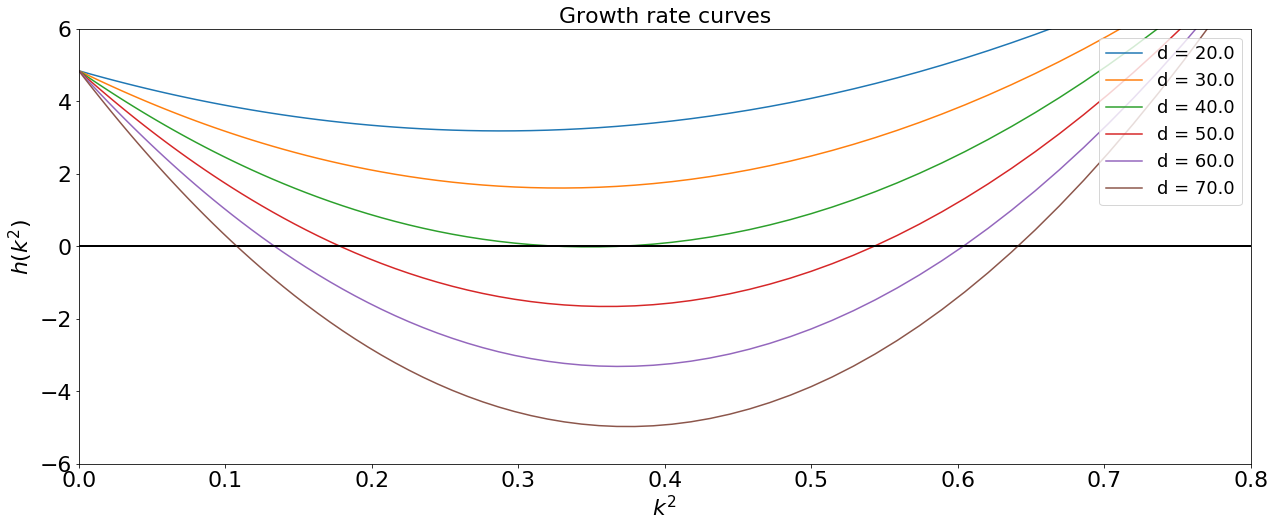

In [20]:
k = np.linspace(0,1,100); k2 = k**2

plt.figure(figsize=(21,8))

for d in np.linspace(20,70,6):
    h = d*k2**2 - gamma*(d*fu+gv)*k2 + gamma**2*detA
    plt.plot(k2,h,label='d = ' + str(d))
    plt.plot(k2,np.zeros(len(k2)),'k')
    plt.xlim(0.0,0.8); plt.ylim(-6,6)
    plt.xlabel('$k^2$', fontsize=22); plt.ylabel('$h(k^2)$', fontsize=22);
    plt.tick_params(labelsize=22); plt.legend(loc=1,prop={'size':18})
    plt.title('Growth rate curves', fontsize=22)

The growth rate curves $h(k^2)$ are in agreement with the critical values $d_c$ and $k_c^2$ that were computed in the last section. Only for values of $d>d_c$ does the system have some chances of being unstable, for wavenumbers $k$ which yield a negative value of $h(k^2)$.

## Determining the Growth Rate curve $\sigma(k)$##

Now, let us perturb the steady state $(u_0,v_0)$ with a small amplitude periodic modulation:

$$
\left( 
\begin{array}
{r}
u \\
v 
\end{array}
\right)
=
\left( 
\begin{array}
{r}
u_0+\delta_u \cos(kx) \\
v_0+\delta_v \cos(kx)
\end{array}
\right).
$$

**Solve the evolution in time of the full system using a FTCS and determine $\delta_u(t)$ and $\delta_v(t)$. Once you have the evolution in time of the amplitudes, fit them to $\delta(t)=\delta_0 e^{\sigma(k)t}$ for the range of times that you consider appropriate. Repeat the process for different $k$ values to get a growth rate curve. Construct a growth rate curve for $d>d_c$ and another one for $d<d_c$. Show these curves in a single plot.** 

In [8]:
def Turing1D(k,d):
    # Constant parameters
    a = 0.2; b = 2.0; gamma = 1;
    
    # Integration parameters
    t0 = 0.0; tF = 10.0; dt = 0.001; Nt = int((tF-t0)/dt + 1)
    
    # Steady state solution
    u0 = a + b; v0 = b/(a+b)**2
    
    # Define simulation parameters for the FTCS scheme
    wavelength=2*np.pi/k
    number_wavelengths=5
    xmin=0; xmax=number_wavelengths*wavelength; dx=0.4
    
    # Generate a mesh for positions x
    x=np.arange(xmin,xmax+dx,dx) ; Nx=len(x)
    
    # Small amplitude periodic perturbation (amplitudes equal to a 10% of the steady state values)
    u = np.zeros(Nx); v = np.zeros(Nx); u_new = u; v_new = v
    deltau = 0.1*u0
    deltav = 0.1*v0
    u = u0 + deltau*np.cos(k*x);
    v = v0 + deltav*np.cos(k*x);
    
    # Integration of the system by means of FTCS
    t = t0; usave = []; vsave = []; tsave = []
    
    while t < tF:
        # Loop to scan space
        for ix in range(1,Nx-1):
            f = a - u[ix] + u[ix]**2*v[ix]
            g = b - u[ix]**2*v[ix]
            u_new[ix] = u[ix] + dt*(gamma*f + 1/(dx*dx)*(u[ix-1]+u[ix+1]-2.0*u[ix]))
            v_new[ix] = v[ix] + dt*(gamma*g + d/(dx*dx)*(v[ix-1]+v[ix+1]-2.0*v[ix]))
        # Set no-flux BC
        u_new[0] = u_new[1]
        u_new[-1] = u_new[-2]
        v_new[0] = v_new[1]
        v_new[-1] = v_new[-2]
        # Update values
        u = np.copy(u_new)
        v = np.copy(v_new)
        # Update time
        t = t+dt
        # Save the maximum amplitude of the perturbations each time step
        usave.append((np.max(u) - np.min(u))/2)
        vsave.append((np.max(v) - np.min(v))/2)
        tsave.append(t)
    
    # Initial guess for fitting
    initial = [0.5, -0.5]
    
    # Eliminate transient
    LL = int(0.2*len(tsave))
    tsave_notrans = tsave[LL:]
    usave_notrans = usave[LL:]
    vsave_notrans = vsave[LL:]
    
    # Fitting tool
    popt_u, pcov_u = optimize.curve_fit(fitting_function, tsave_notrans, usave_notrans, initial)
    popt_v, pcov_v = optimize.curve_fit(fitting_function, tsave_notrans, vsave_notrans, initial)
    udelta = popt_u[0]; usigma = popt_u[1]; vdelta = popt_v[0]; vsigma = popt_v[1]
    
    return usave,vsave,tsave,usigma,vsigma

In [9]:
def fitting_function(t, A, B):
    return A*np.exp(B*t)

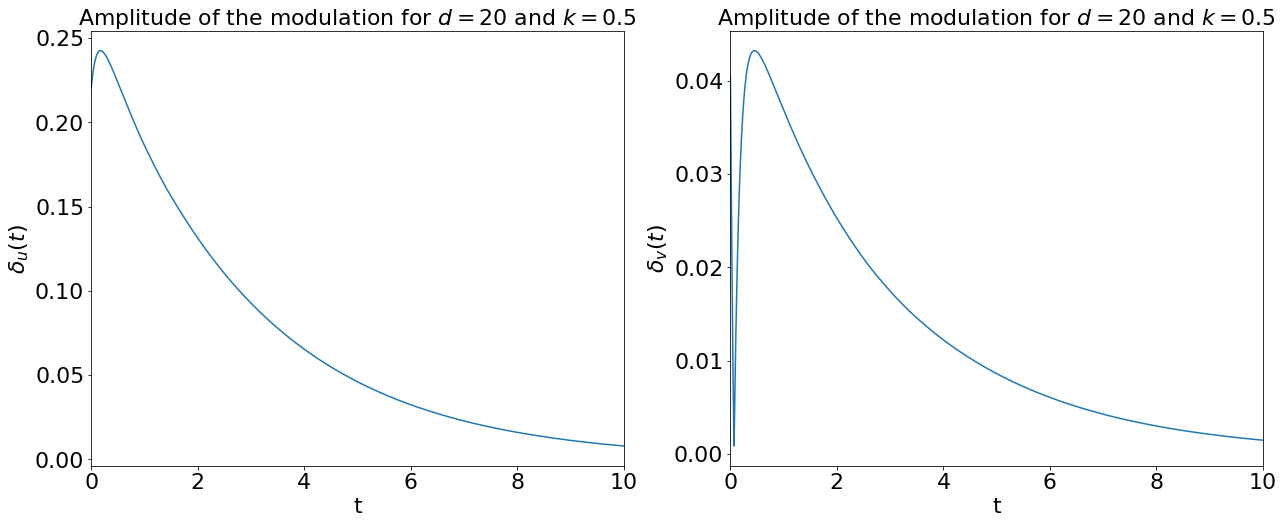

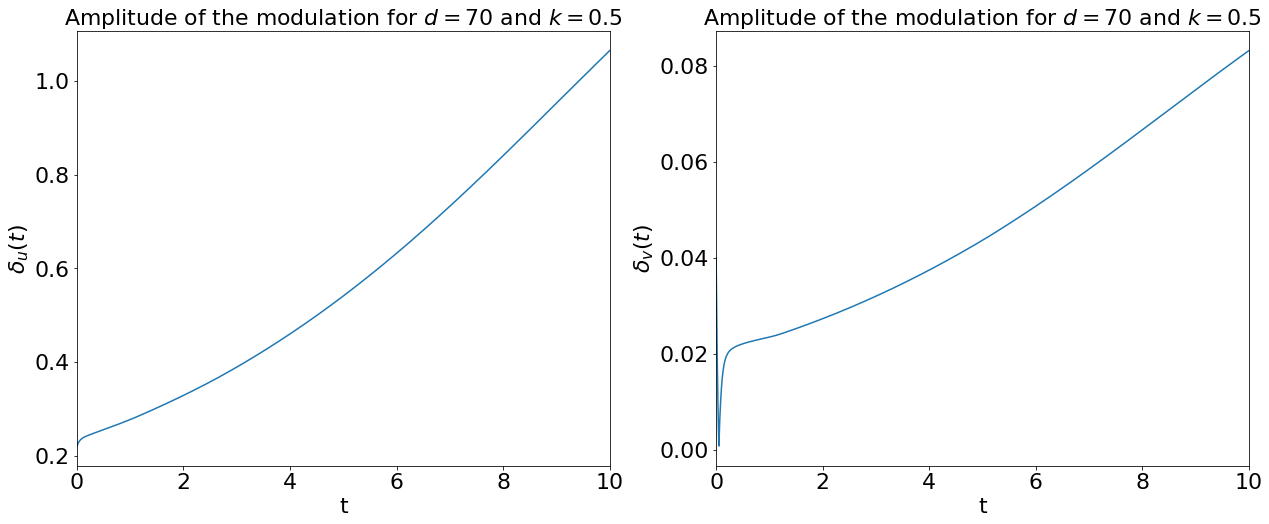

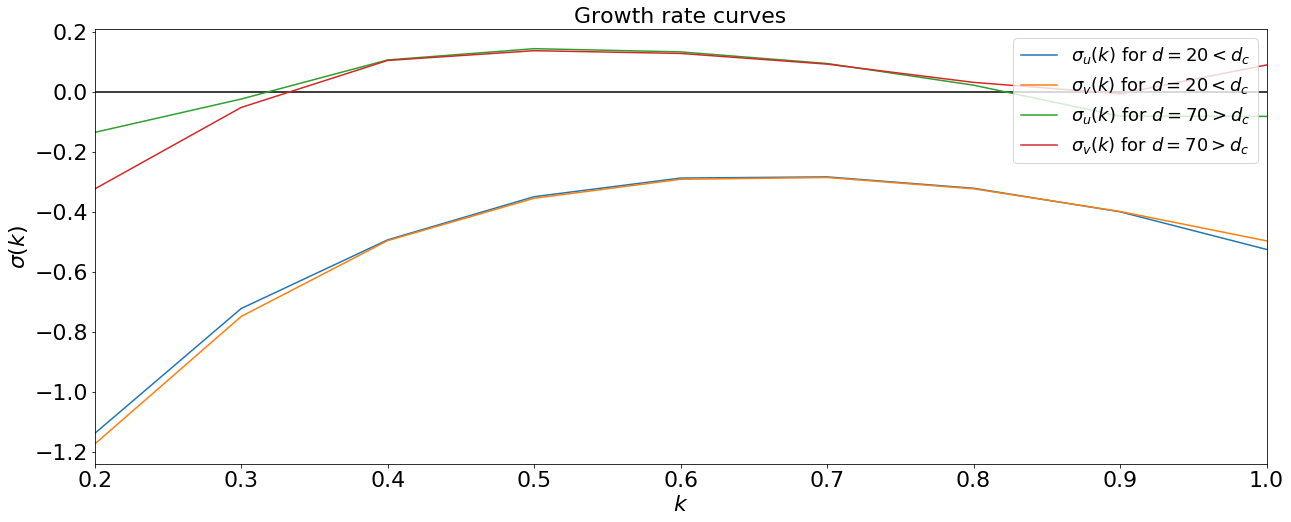

In [13]:
# WARNING! This simulation may take of the order of 5min to finish in a standard laptop computer.

# Stable case, with d < d_c
d = 20; stablek = []; stableusigma = []; stablevsigma = []
for k in np.linspace(0.2,0.5,4):
    usave,vsave,tsave,usigma,vsigma = Turing1D(k,d)
    stableu = usave
    stablev = vsave
    stablet = tsave
    stablek.append(k)
    stableusigma.append(usigma)
    stablevsigma.append(vsigma)   
# Plot the amplitudes of the periodic modulations
plt.figure(figsize=(21,8))
plt.subplot(121)
plt.plot(tsave, usave, label='$\delta_u(t)$'); plt.xlim(0.0,10.0);
plt.xlabel('t', fontsize=22); plt.ylabel('$\delta_u(t)$', fontsize=22); plt.tick_params(labelsize=22);
plt.title('Amplitude of the modulation for $d=20$ and $k=0.5$', fontsize=22);
plt.subplot(122)
plt.plot(tsave, vsave, label='$\delta_v(t)$'); plt.xlim(0.0,10.0);
plt.xlabel('t', fontsize=22); plt.ylabel('$\delta_v(t)$', fontsize=22); plt.tick_params(labelsize=22);
plt.title('Amplitude of the modulation for $d=20$ and $k=0.5$', fontsize=22);
for k in np.linspace(0.6,1.0,5):
    usave,vsave,tsave,usigma,vsigma = Turing1D(k,d)
    stableu = usave
    stablev = vsave
    stablet = tsave
    stablek.append(k)
    stableusigma.append(usigma)
    stablevsigma.append(vsigma)  

# Unstable case, with d > d_c
d = 70; unstablek = []; unstableusigma = []; unstablevsigma = []
for k in np.linspace(0.2,0.5,4):
    usave,vsave,tsave,usigma,vsigma = Turing1D(k,d)
    unstablek.append(k)
    unstableusigma.append(usigma)
    unstablevsigma.append(vsigma)
# Plot the amplitudes of the periodic modulations
plt.figure(figsize=(21,8))
plt.subplot(121)
plt.plot(tsave, usave, label='$\delta_u(t)$'); plt.xlim(0.0,10.0);
plt.xlabel('t', fontsize=22); plt.ylabel('$\delta_u(t)$', fontsize=22); plt.tick_params(labelsize=22);
plt.title('Amplitude of the modulation for $d=70$ and $k=0.5$', fontsize=22);
plt.subplot(122)
plt.plot(tsave, vsave, label='$\delta_v(t)$'); plt.xlim(0.0,10.0);
plt.xlabel('t', fontsize=22); plt.ylabel('$\delta_v(t)$', fontsize=22); plt.tick_params(labelsize=22);
plt.title('Amplitude of the modulation for $d=70$ and $k=0.5$', fontsize=22);
for k in np.linspace(0.6,1.0,5):
    usave,vsave,tsave,usigma,vsigma = Turing1D(k,d)
    unstablek.append(k)
    unstableusigma.append(usigma)
    unstablevsigma.append(vsigma)
    
# Plot both growth rate curves
plt.figure(figsize=(21,8))
plt.plot(stablek,np.zeros(len(stablek)),'k')
plt.plot(stablek, stableusigma, label='$\sigma_u(k)$ for $d=20<d_c$');
plt.plot(stablek, stablevsigma, label='$\sigma_v(k)$ for $d=20<d_c$');
plt.plot(unstablek, unstableusigma, label='$\sigma_u(k)$ for $d=70>d_c$');
plt.plot(unstablek, unstablevsigma, label='$\sigma_v(k)$ for $d=70>d_c$');
plt.xlabel('$k$', fontsize=22); plt.ylabel('$\sigma(k)$', fontsize=22); plt.tick_params(labelsize=22);
plt.title('Growth rate curves', fontsize=22); plt.xlim(min(stablek),max(stablek));
plt.legend(loc=1,prop={'size':18});

As expected, when $d<d_c$, every $\sigma(k)$ is negative, thus making all perturbations to vanish with time whatever the value of the wavenumber $k$, and not allowing for pattern-like final states. The amplitudes corresponding to that tend to zero as time increases.

However, when $d>d_c$, the growth rate curve shows that some values of $k$ correspond to positive values of $\sigma(k)$, that is, some perturbation modes that will not vanish with time. These are the interesting ones, since they might be responsible for forming patterns, as it will be studied in the next section. Note that the corresponding amplitudes grow, but without diverging towards very high values in the time considered for the simulation. Otherwise, numerical errors would appear.

## Two-dimensional behaviour ##

**Now we will solve the evolution in time of the system in two dimensions using the FTCS method. Prepare a code,  with no flux or periodic boundary conditions, that can be run for any arbitrary initial condition.**

In [96]:
def Turing2D(init_u,init_v,d):
    # Constant parameters
    a = 0.2; b = 2.0; gamma = 1;
    
    # Integration parameters
    t0 = 0.0; tF = 10.0; dt = 0.001; Nt = int((tF-t0)/dt + 1)
    
    # Initial conditions
    u=init_u; v=init_v; u_new=u; v_new=v
    
    # Integration of the system by means of FTCS
    t = t0; usave = []; vsave = []; tsave = []
    while t < tF:
        # Loops to scan space
        for ix in range(1,Nx-1):
            for iy in range(1,Ny-1):
                f = a - u[ix,iy] + u[ix,iy]**2*v[ix,iy]
                g = b - u[ix,iy]**2*v[ix,iy]
                u_new[ix,iy] = u[ix,iy] + dt*(gamma*f + 1/(dx*dx)*(u[ix-1,iy]+u[ix+1,iy]-2.0*u[ix,iy]) + 1/(dy*dy)*(u[ix,iy-1]+u[ix,iy+1]-2.0*u[ix,iy]))
                v_new[ix,iy] = v[ix,iy] + dt*(gamma*g + d/(dx*dx)*(v[ix-1,iy]+v[ix+1,iy]-2.0*v[ix,iy]) + d/(dy*dy)*(v[ix,iy-1]+v[ix,iy+1]-2.0*v[ix,iy]))
        # Set no-flux BC in x
        u_new[0,:] = u_new[1,:]
        u_new[-1,:] = u_new[-2,:]
        v_new[0,:] = v_new[1,:]
        v_new[-1,:] = v_new[-2,:]
        # Set no-flux BC in y
        u_new[:,0] = u_new[:,1]
        u_new[:,-1] = u_new[:,-2]
        v_new[:,0] = v_new[:,1]
        v_new[:,-1] = v_new[:,-2]
        # Update values
        u = u_new
        v = v_new
        # Update time
        t = t+dt
        # Save the maximum amplitude of the perturbations each time step
        usave.append((np.max(u) - np.min(u))/2)
        vsave.append((np.max(v) - np.min(v))/2)
        tsave.append(t)
    
    return u,v,usave,vsave,tsave

## Mimicking an experimental situation ##

Now, let us perturb the two-dimensional steady state with a small stochastic perturbation. A gaussian distribution will do. **Considering this initial condition, let evolve, for a total time not too long, a large system (so that several wavelengths fit in the system) using the FTCS for a $d<d_c$ and for $d>d_c$. Show, (use imshow) the initial and final state for $u$. Use the same colorbar range for the two images to emphasize the decrease (for $d<d_c$) or the increase (for $d>d_c$) of the amplitude when the system evolves. Plot also the evolution in time of the amplitude measured as the $max(u(\vec{x}))-min(u(\vec{x}))$. Optional: You may also plot the two-dimensional Power Spectrum for each image. Comment your results.**

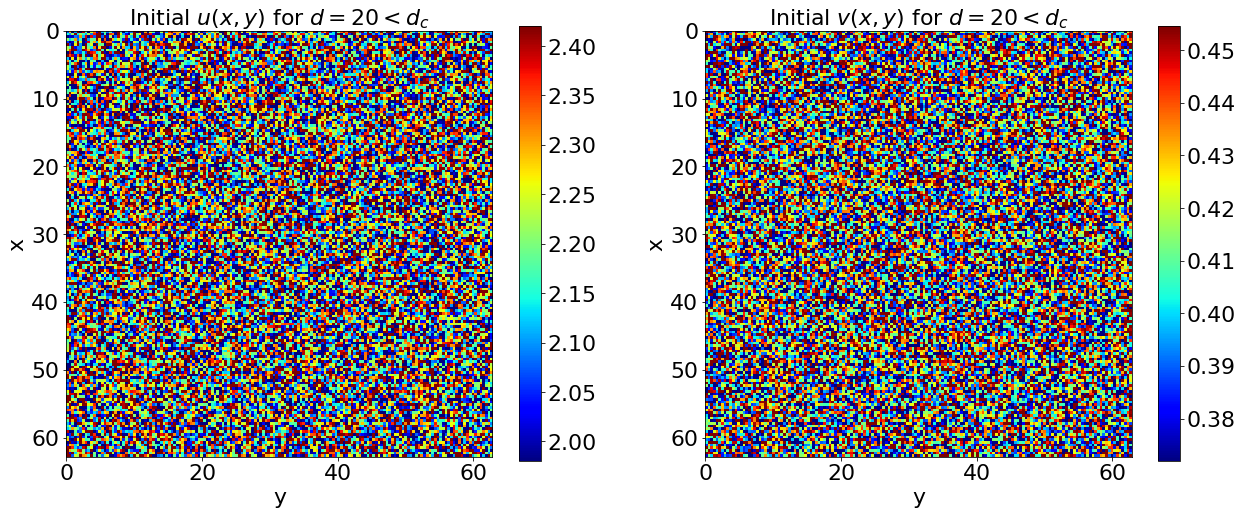

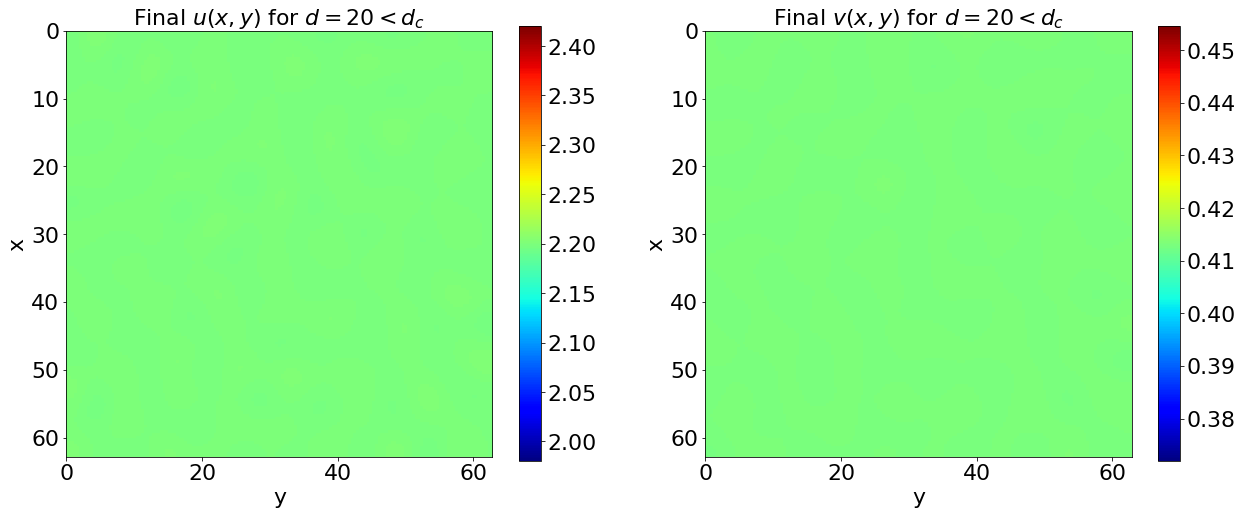

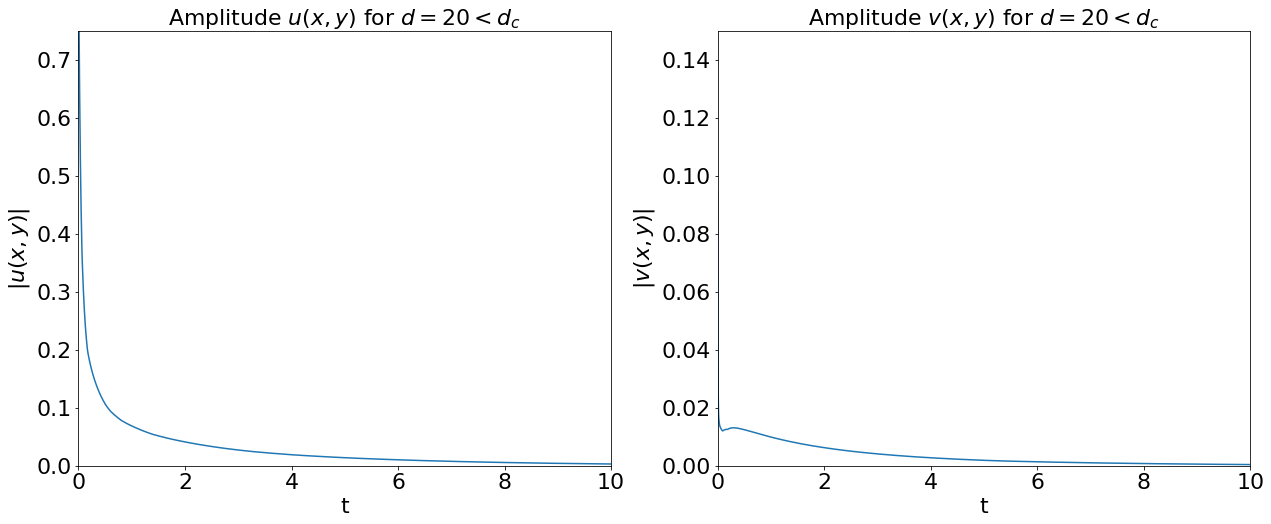

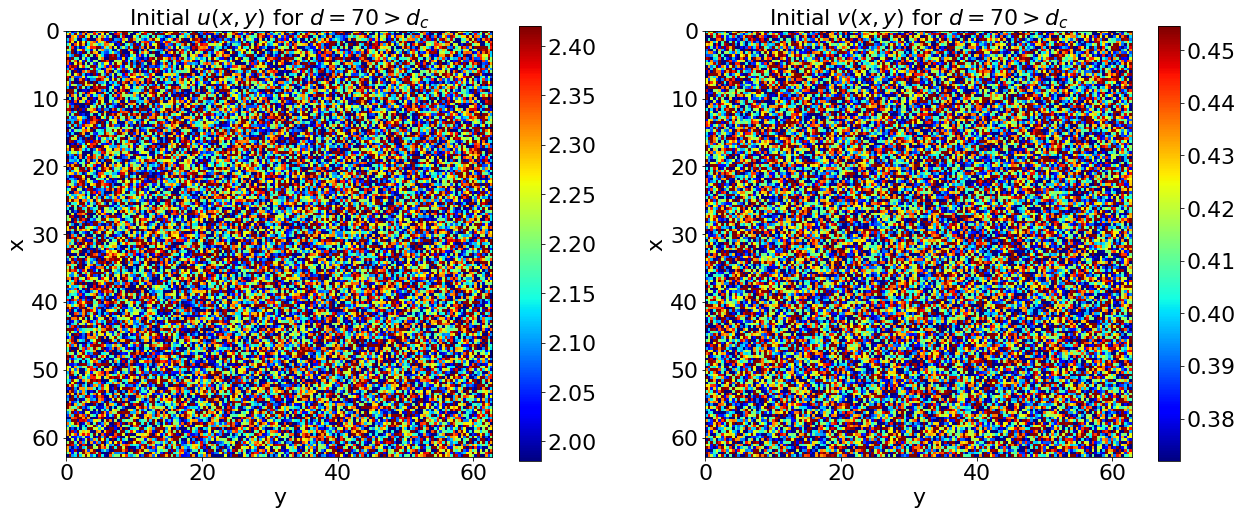

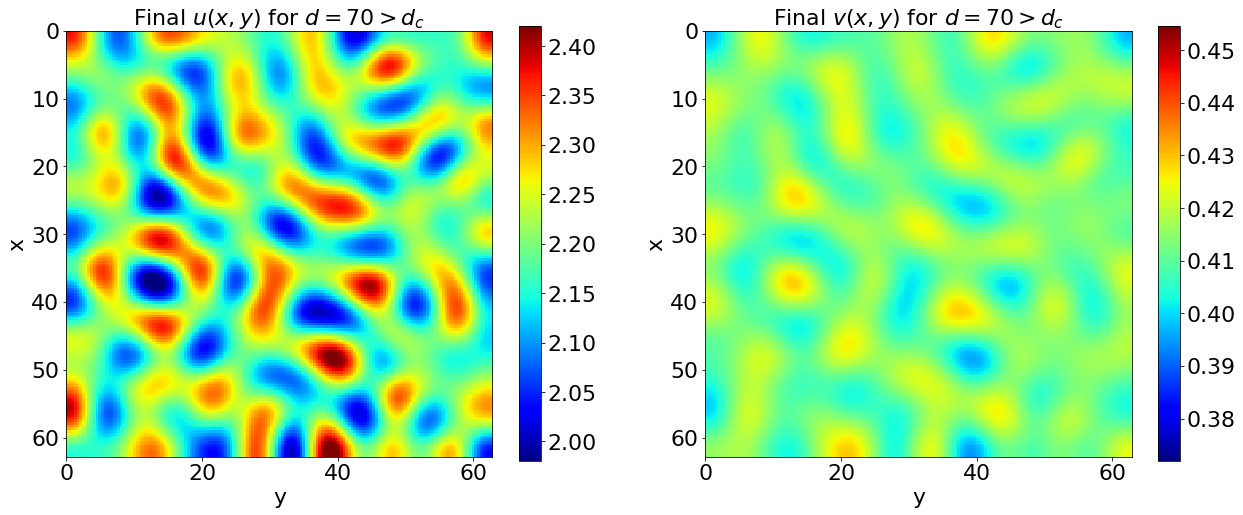

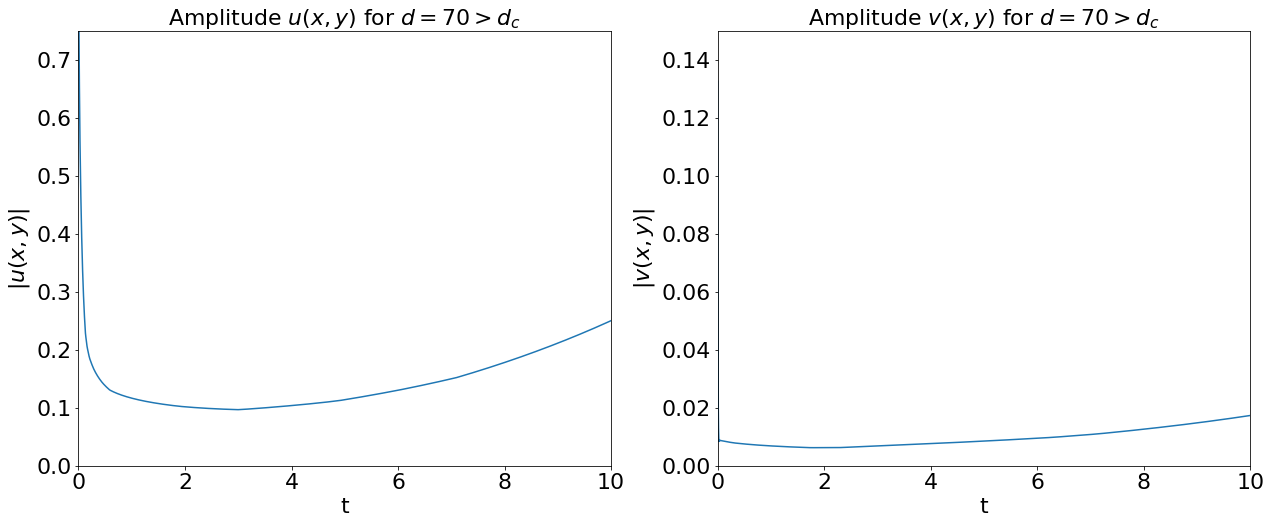

In [103]:
# WARNING! This simulation may take of the order of 1h 45min to finish in a standard laptop computer.

# Constant parameters
a = 0.2; b = 2.0; gamma = 1;

# Steady state solution
u0 = a + b; v0 = b/(a+b)**2

# Define simulation parameters for the FTCS scheme in the x coordinate
kx = 0.5; wavelength_x=2*np.pi/kx; number_wavelengths_x=5
xmin=0; xmax=number_wavelengths_x*wavelength_x; dx=0.4

# Generate a mesh for positions x
x=np.arange(xmin,xmax+dx,dx); Nx=len(x)

# Define simulation parameters for the FTCS scheme in the y coordinate
ky = 0.5; wavelength_y=2*np.pi/ky; number_wavelengths_y=5
ymin=0; ymax=number_wavelengths_y*wavelength_y; dy=0.4

# Generate a mesh for positions y
y=np.arange(ymin,ymax+dy,dy); Ny=len(y)

# SIMULATION for d < d_c
d = 20
init_u = u0 + np.random.normal(0,0.1*u0,(Nx,Ny)); init_v = v0 + np.random.normal(0,0.1*v0,(Nx,Ny))
plt.figure(figsize=(21,8));
plt.subplot(121)
plt.imshow(init_u, vmin=0.9*u0, vmax=1.1*u0, cmap='jet', interpolation='none', extent=[xmin,xmax,ymax,ymin])
plt.xlabel('y', fontsize=22); plt.ylabel('x', fontsize=22); cbar=plt.colorbar(); cbar.ax.tick_params(labelsize=22) 
plt.title('Initial $u(x,y)$ for $d=20<d_c$', fontsize=22); plt.tick_params(labelsize=22);
plt.subplot(122)
plt.imshow(init_v, vmin=0.9*v0, vmax=1.1*v0, cmap='jet', interpolation='none', extent=[xmin,xmax,ymax,ymin])
plt.xlabel('y', fontsize=22); plt.ylabel('x', fontsize=22); cbar=plt.colorbar(); cbar.ax.tick_params(labelsize=22)
plt.title('Initial $v(x,y)$ for $d=20<d_c$', fontsize=22); plt.tick_params(labelsize=22);
u,v,usave,vsave,tsave = Turing2D(init_u,init_v,d)
plt.figure(figsize=(21,8));
plt.subplot(121) 
plt.imshow(u, vmin=0.9*u0, vmax=1.1*u0, cmap='jet', interpolation='none', extent=[xmin,xmax,ymax,ymin])
plt.xlabel('y', fontsize=22); plt.ylabel('x', fontsize=22); cbar=plt.colorbar(); cbar.ax.tick_params(labelsize=22) 
plt.title('Final $u(x,y)$ for $d=20<d_c$', fontsize=22); plt.tick_params(labelsize=22);
plt.subplot(122)
plt.imshow(v, vmin=0.9*v0, vmax=1.1*v0, cmap='jet', interpolation='none', extent=[xmin,xmax,ymax,ymin])
plt.xlabel('y', fontsize=22); plt.ylabel('x', fontsize=22); cbar=plt.colorbar(); cbar.ax.tick_params(labelsize=22)
plt.title('Final $v(x,y)$ for $d=20<d_c$', fontsize=22); plt.tick_params(labelsize=22);
plt.figure(figsize=(21,8));
plt.subplot(121)
plt.plot(tsave,usave)
plt.xlabel('t', fontsize=22); plt.ylabel('$|u(x,y)|$', fontsize=22); plt.tick_params(labelsize=22);
plt.title('Amplitude $u(x,y)$ for $d=20<d_c$', fontsize=22); plt.xlim(0.0,10.0); plt.ylim(0.0,0.75);
plt.subplot(122)
plt.plot(tsave,vsave)
plt.xlabel('t', fontsize=22); plt.ylabel('$|v(x,y)|$', fontsize=22); plt.tick_params(labelsize=22);
plt.title('Amplitude $v(x,y)$ for $d=20<d_c$', fontsize=22); plt.xlim(0.0,10.0); plt.ylim(0.0,0.15);

# SIMULATION for d > d_c
d = 70
init_u = u0 + np.random.normal(0,0.1*u0,(Nx,Ny)); init_v = v0 + np.random.normal(0,0.1*v0,(Nx,Ny))
plt.figure(figsize=(21,8));
plt.subplot(121)
plt.imshow(init_u, vmin=0.9*u0, vmax=1.1*u0, cmap='jet', interpolation='none', extent=[xmin,xmax,ymax,ymin])
plt.xlabel('y', fontsize=22); plt.ylabel('x', fontsize=22); cbar=plt.colorbar(); cbar.ax.tick_params(labelsize=22) 
plt.title('Initial $u(x,y)$ for $d=70>d_c$', fontsize=22); plt.tick_params(labelsize=22);
plt.subplot(122)
plt.imshow(init_v, vmin=0.9*v0, vmax=1.1*v0, cmap='jet', interpolation='none', extent=[xmin,xmax,ymax,ymin])
plt.xlabel('y', fontsize=22); plt.ylabel('x', fontsize=22); cbar=plt.colorbar(); cbar.ax.tick_params(labelsize=22)
plt.title('Initial $v(x,y)$ for $d=70>d_c$', fontsize=22); plt.tick_params(labelsize=22);
u,v,usave,vsave,tsave = Turing2D(init_u,init_v,d)
plt.figure(figsize=(21,8));
plt.subplot(121)
plt.imshow(u, vmin=0.9*u0, vmax=1.1*u0, cmap='jet', interpolation='none', extent=[xmin,xmax,ymax,ymin])
plt.xlabel('y', fontsize=22); plt.ylabel('x', fontsize=22); cbar=plt.colorbar(); cbar.ax.tick_params(labelsize=22) 
plt.title('Final $u(x,y)$ for $d=70>d_c$', fontsize=22); plt.tick_params(labelsize=22);
plt.subplot(122)
plt.imshow(v, vmin=0.9*v0, vmax=1.1*v0, cmap='jet', interpolation='none', extent=[xmin,xmax,ymax,ymin])
plt.xlabel('y', fontsize=22); plt.ylabel('x', fontsize=22); cbar=plt.colorbar(); cbar.ax.tick_params(labelsize=22)
plt.title('Final $v(x,y)$ for $d=70>d_c$', fontsize=22); plt.tick_params(labelsize=22);
plt.figure(figsize=(21,8));
plt.subplot(121)
plt.plot(tsave,usave)
plt.xlabel('t', fontsize=22); plt.ylabel('$|u(x,y)|$', fontsize=22); plt.tick_params(labelsize=22);
plt.title('Amplitude $u(x,y)$ for $d=70>d_c$', fontsize=22); plt.xlim(0.0,10.0); plt.ylim(0.0,0.75);
plt.subplot(122)
plt.plot(tsave,vsave)
plt.xlabel('t', fontsize=22); plt.ylabel('$|v(x,y)|$', fontsize=22); plt.tick_params(labelsize=22);
plt.title('Amplitude $v(x,y)$ for $d=70>d_c$', fontsize=22); plt.xlim(0.0,10.0); plt.ylim(0.0,0.15);

## Concluding remarks ##

### Stable case - Nothing happens ###

On the one hand, for the case $d<d_c$, as expected, no pattern shows up. The initial gaussian perturbation vanishes in finite time, thus reaching the steady state solution. This dynamics can also be checked by looking at the amplitude of the perturbations, which tend to zero as time increases.

### Unstable case - Patterns show up ###

On the other hand, for the case $d>d_c$, as expected, a nice pattern shows up. The initial gaussian perturbation is not vanishing, and it is indeed responsible for ultimately creating the aforementioned patterns.

When looking at how the amplitudes of the perturbations evolve in time, it is clear that they do not vanish. Moreover, they grow up. This leads to wonder about what would happen if the simulation were run for more time. In fact, if too much simulation time is considered, the author of this work ensures that the whole system diverges and numerical overflow appears.

### General considerations ###

So when simulating this system, one must be very careful with the time of simulation. Another important parameter to take into account is the $d$ parameter itself. The higher it is, the less stable the system. For the same time of integration of this simulation, but changing $d$ from $d=70$ to $d=80$, numerical overflow already appears. In contrast, when changing from $d=70$ to $d=50$, the time of simulation considered here is not enough to clearly see the patterns; and when changing from $d=20$ to $d=30$, the final state features a graph where the initial perturbation has not had enough time to completely vanish.

Therefore, one can either increase the time simulation or modify the $d$ parameter in order to obtain nice results. The first choice is not recommended, given that the simulation already lasts for roughly 2 hours in a standard laptop computer. In this project, the second option was chosen, and that is why there appear values of $d=70$ instead of $d=50$ or $d=20$ instead of $d=30$, which may be more interesting since they are closer to the critical value $d_c$. One could also try crazy values like $d=100$ and $d=5$, for instance, and reduce the time of simulation, but this third option was simply not considered in this work since the second option already worked well.

Other important parameters are $dx$ and $dy$. For $k_x=k_y=0.5$ and a square size of $5\ wavelengths$ in both $x$ and $y$ directions, some good values are $dx=dy=0.4$, which were used in the simulation. If those values were higher, say $dx=dy=1.5$, then the simulation is really quick, but the resolution is poor. The author ensures that the results corresponding to those parameters are not visually pleasant, the final pattern looking like a pixelated image. And if one tries $dx$ and $dy$ lower than those, say $dx=dy=0.2$, numerical overflow appears. So the optimal value for having good resolution in the final image without encountering numerical problems, with the aforementioned wavenumbers and lattice size, is near $dx=dy=0.4$, if you do not mind waiting a couple of hours for the simulation to finish.